# BOW - Bag of Words

* 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도값을 부여해 피처값을 추출하는 모델

### 장단점

* 장점
    * 쉽고 빠른 구축
    * 단어의 발생 횟수에 기반하고 있지만, 예상보다 문서의 특징을 잘 나타낼 수 있는 모델.

* 단점
    * 문맥 의미 반영 부족 : 순서를 고려하지 않기 때문. 이를 보완하기 위해 **n-gram** 기법을 활용할 수 있지만 제한적.
    * 희소 행렬 문제 : 매우 많은 단어가 칼럼으로 만들어져 대부분의 데이터가 0으로 채워짐 => 성능 감소
        * 희소 행렬 : 행렬에서 대부분의 값이 0으로 채워지는 행렬
        * 밀집 행렬 : 대부분의 값이 0이 아닌 의미 있는 값으로 채워지는 행렬

### BOW 피처 벡터화

* 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환.
* 모든 문서에서 모든 단어를 컬럼 형태로 나열
* 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경.

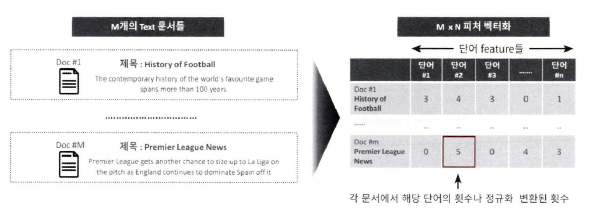


### BOW의 피처 벡터화 방식
* 카운트 기반의 벡터화
    * 각 문서에서 해당 단어가 나타나는 횟수(Count)를 부여하는 경우
    * 카운트 값이 높을수록 중요 단어임
    * 자주 사용되는 단어까지 높은 값 부여(is, the 등)

* TF-IDF(Term Frequency - Inverse Document Frequency) 기반의 벡터화
    * 카운트 기반의 벡터화의 문제점을 보완
    * 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티 부여하는 방식
        * ex) '분쟁', '종교 대립' 자주 사용 -> 지역 분쟁과 관련된 문서 -> 가중치 부여
        * ex) '많은', '당연히', '업무' -> 보편적으로 많이 사용되어 문서의 특징과 관련있다고 보기 어려움 -> 패널티 부여
        
### 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer , TfidfVectorizer

#### 피처 벡터화 과정
1. 영어의 경우 모든 문자를 소문자로 변경 -> 전처리
2. 디폴트로 단어 기준으로 n_gram_range 반영하여 각 단어를 토큰화
3. 텍스트 정규화 수행(불용어 필터링만 수행)
4. 토큰화된 단어를 피처로 추출, 단어 빈도수 벡터 값 적용

* CountVectorizer() 파라미터
    * max_df : 높은 빈도수를 가지는 단어 제외하기 위한 파라미터(0.95면 상위 5% 제외)
    * min_df : 낮은 빈도수를 가지는 단어 제외하기 위한 파라미터(0.02면 하위 2% 제외)
    * max_features : 추출하는 피처의 개수를 제한(2000으로 지정 시 가장 높은 빈도를 가지는 단어순으로 정렬해 2000개까지만 추출)
    * stop_words : 불용어 제외(스톱 워드)
    * n_gram_range : 튜플 형태로 (범위 최솟값, 범위 최댓값) 지정
    * analyzer : 피처 추출을 수행한 단위를 지정(default='word')
    * token_pattern : 토큰화를 수행하는 정규 표현식 패턴 지정.(default='\b\w\w+\b' => 공백 또는 개행 문자 등으로 구분된 단어 분리자(\b) 사이의 2문자(문자 또는 숫자) 이상의 단어(word)를 토큰으로 분리. analyzer='word'로 설정했을 때만 변경가능하나 디폴트 값을 변경할 경우는 거의 발생하지 않음)
    * tokenizer : 토큰화를 별도의 커스텀 함수로 이용시 적용

* TfidfVectorizer()는 CountVectorizer()와 동일

### BOW 벡터화를 위한 희소 행렬
* 희소 행렬
    * 대규모 행렬의 대부분의 값을 0이 차지하는 행렬.
    * BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬.
    * 너무 많은 불필요한 0값이 메모리 공간에 할당되어 많은 메모리 공간이 필요.
    * 작은 공간을 차지하도록 변환 : COO, CSR 형식

* 희소 행렬 - COO(Coordinate : 좌표) 형식
    * 0이 아닌 데이터만 별도의 데이터 배열(Array)에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식.
    * ex. [[3, 0, 1], [0, 2, 0]] -> 0이 아닌 데이터는 [3, 1, 2]이며 0이 아닌 데이터가 있는 위치를 (row, col)로 표시 -> (0, 0), (0, 2), (1, 1)

In [1]:
# COO 형식
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])

# 사이파이의 coo_matrix 클래스 이용 -> coo 형식의 희소 행렬 로 변환
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용해 COO 형싱으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [2]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

* 희소 행렬 - CSR(Compressed Sparse Row) 형식
    * COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식
    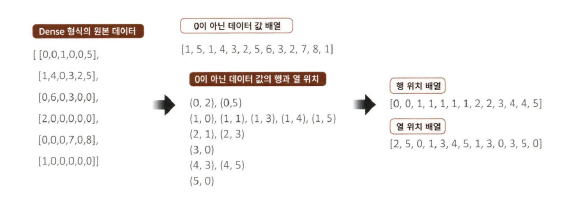
    
    * 행 위치 배열 [0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5] -> [0, 2, 7, 9, 10, 12, 13] (index만 표현)

    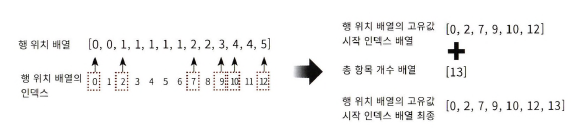

    * 메모리가 적게 들고 빠른 연산이 가능함.

In [3]:
# CRS -> 사이파이의 csr_matrix 클래스 이용
# 0이 아닌 데이터 배열과 열 위치 배열, 그리고 행 위치 배열의 고유한 값의 시작 위치 배열을 csr_matrix의 생성 파라미터로 입력한다.
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


COO와 CSR이 어떻게 희소 행렬의 메모리를 줄일 수 있는지 확인했다. 실제 사용시 아래와 같이 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성한다.

In [4]:
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                [1, 4, 0, 3, 2, 5],
                [0, 6, 0, 3, 0, 0],
                [2, 0, 0, 0, 0, 0],
                [0, 0, 0, 7, 0, 8],
                [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

사이킷런의 CountVectorizer나 TfidfVectorizer 클래스로 변환된 피처 벡터화 행렬은 모두 사이파이의 CSR 행렬의 희소 행렬이다.